In [2]:
import tensorflow as tf
from keras import datasets, layers, callbacks, models, optimizers
print(tf.__version__)

2.18.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Making dataset
N = 5000
X = np.random.random((N, 2))
X = X * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])

In [5]:
X

array([[ 1.17390124, -2.2228947 ],
       [-2.3012783 ,  1.64512326],
       [ 0.37109985, -0.32026635],
       ...,
       [ 2.19164386,  0.79991904],
       [ 0.06502847, -2.56236433],
       [ 2.32218049,  1.30095414]])

In [6]:
Y

array([ 0.22546309,  0.1115259 ,  1.30984879, ..., -1.06042229,
        1.15766953, -0.7919362 ])

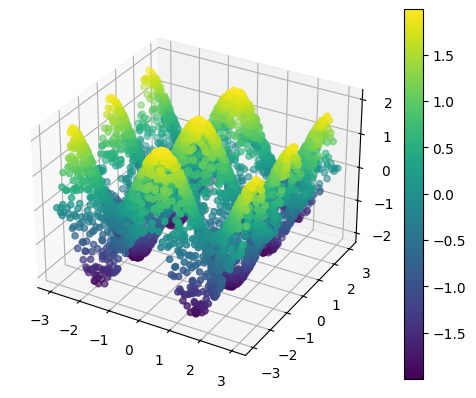

In [7]:
# Enable interactive mode to interact with 3D plot
# %matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], Y)
sc = ax.scatter(X[:, 0], X[:, 1], Y, c=Y, cmap='viridis')
plt.colorbar(sc)
plt.show()

In [8]:
model = models.Sequential([
    layers.Input(shape=(2, )),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

In [9]:
model.compile(
    optimizer=optimizers.Adam(0.001),
    loss='mse',
    metrics=['mse']
)

In [10]:
early_stopping = callbacks.EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True
)

In [11]:
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = callbacks.LearningRateScheduler(schedule)

In [12]:
r = model.fit(X, Y, epochs=100, callbacks=[early_stopping, scheduler])

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9399 - mse: 0.9399 - learning_rate: 0.0010
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8518 - mse: 0.8518 - learning_rate: 0.0010
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8596 - mse: 0.8596 - learning_rate: 0.0010
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8447 - mse: 0.8447 - learning_rate: 0.0010
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8440 - mse: 0.8440 - learning_rate: 0.0010
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8231 - mse: 0.8231 - learning_rate: 0.0010
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8200 - mse: 0.8200 - learning_rate: 0.0010
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8196 - mse: 0.8196 - learning_rate: 0.0010
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7760 - mse: 0.7760 - learning_rate: 0.0010
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1

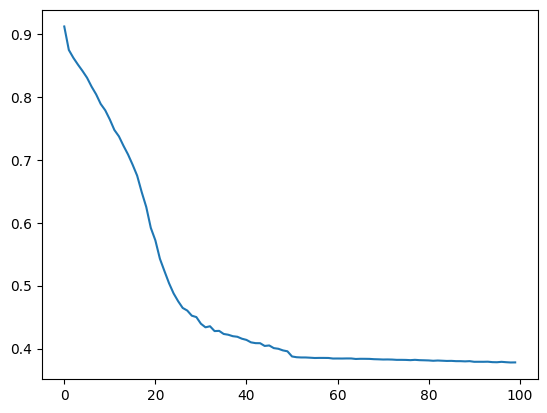

In [13]:
plt.plot(r.history['loss'], label='loss')

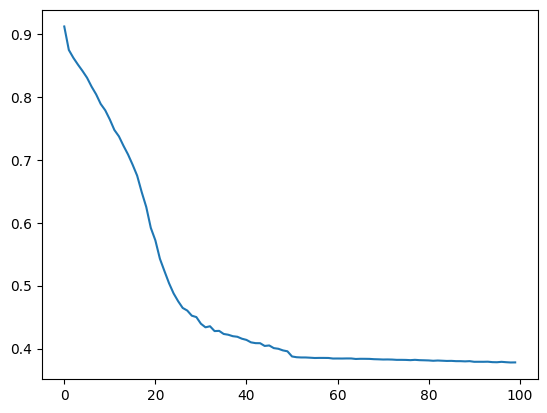

In [14]:
plt.plot(r.history['mse'], label='mse')

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


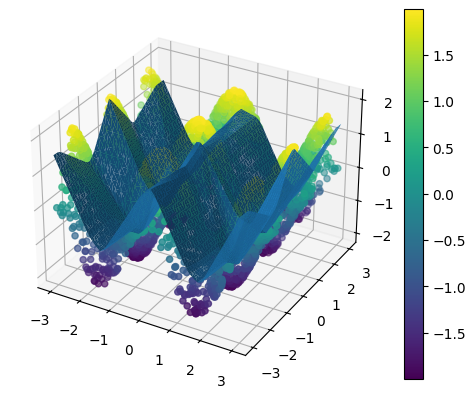

In [21]:
# Enable interactive mode to interact with 3D plot
# %matplotlib notebook
# %matplotlib inline

# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], Y)
sc = ax.scatter(X[:, 0], X[:, 1], Y, c=Y, cmap='viridis')
plt.colorbar(sc)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
X_grid = np.vstack((xx.flatten(), yy.flatten())).T
Y_hat = model.predict(X_grid).flatten()
ax.plot_trisurf(X_grid[:, 0], X_grid[:, 1], Y_hat, linewidth=0.2, antialiased=True)
plt.show()

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step


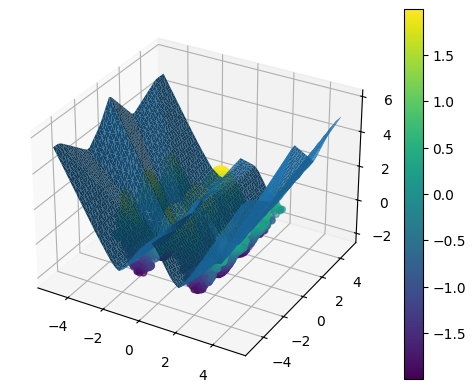

In [25]:
# Can it extrapolate?
# Enable interactive mode to interact with 3D plot
# %matplotlib notebook
# %matplotlib inline

# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], Y)
sc = ax.scatter(X[:, 0], X[:, 1], Y, c=Y, cmap='viridis')
plt.colorbar(sc)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
X_grid = np.vstack((xx.flatten(), yy.flatten())).T
Y_hat = model.predict(X_grid).flatten()
ax.plot_trisurf(X_grid[:, 0], X_grid[:, 1], Y_hat, linewidth=0.2, antialiased=True)
plt.show()
